In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random as rd
import scipy.optimize

%matplotlib inline

In [48]:
to = [_ for _ in range(20)]
t_df = pd.DataFrame(data=to)
t = t_df[0].to_numpy()

In [61]:
no = [800., 
      723.86993443, 
      654.98460246, 
      592.65457655, 
      536.25603683, 
      485.22452777,
      439.04930888,
      397.26824303,
      359.46317129,
      325.25572779,
      294.30355294,
      266.29686696,
      240.95536953,
      218.02543443,
      197.27757115,
      178.50412812,
      161.5172144,
      146.14681924,
      132.23911058,
      119.65489538]
n_df = pd.DataFrame(data=no)
n = n_df[0].to_numpy()

In [49]:
# 1A
def fit_exp(t, N_0, k):
  return N_0*np.exp(-k*t)

[300.         271.45122541 245.61922592 222.2454662  201.09601381
 181.95919791 164.64349083 148.97559114 134.79868924 121.97089792
 110.36383235  99.86132511  90.35826357  81.75953791  73.97908918
  66.93904804  60.5689554   54.80505722  49.58966647  44.87058577]


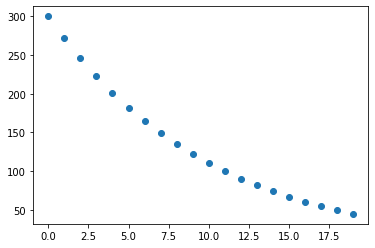

In [50]:
exp_function = fit_exp(tn, 300, 0.1)
print(exp_function)
plt.scatter(tn,exp_function)

In [ ]:
# 1B

In [51]:
initial_guess = [400,0.1]

In [102]:
parameters, covariance = scipy.optimiz e.curve_fit(fit_exp, t, n, initial_guess)

In [101]:
print(parameters, covariance, end='\n')

[8.e+02 1.e-01] [[2.9071647e-18 4.3665547e-22]
 [4.3665547e-22 1.3172879e-25]]


In [71]:
# Test above
try:
  assert parameters.any()
  assert covariance.any()
  print('passed')
except NameError:
  print('wrong spelling')

passed


In [72]:
N_0 = parameters[0]
k = parameters[1]

In [74]:
# Test above
try:
  assert N_0
  assert k
  print('passed')
except NameError:
  print('wrong spelling')

passed


In [80]:
# 1C
fitted_n = fit_exp(t,N_0,k)

In [81]:
fitted_n

array([800.        , 723.86993443, 654.98460246, 592.65457655,
       536.25603683, 485.22452777, 439.04930888, 397.26824303,
       359.46317129, 325.25572779, 294.30355294, 266.29686696,
       240.95536953, 218.02543443, 197.27757115, 178.50412812,
       161.5172144 , 146.14681924, 132.23911058, 119.65489538])

<AxesSubplot:>

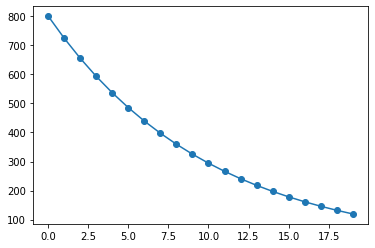

In [87]:
# 1D
def plot_exp(t, n, fitted_n):
  plt.scatter(t, n)
  plt.plot(t, fitted_n)
  return plt.gca()

plot_exp(t, n, fitted_n)

In [97]:
# 1E 
k_new = 0.15

In [99]:
def get_half_life(k_new):
  ln2 = np.log(2) # euler based logarithm
  return ln2/k_new

In [100]:
t_half = get_half_life(k_new)
print(f'The half-life is {t_half:.2} s.')

The half-life is 4.6 s.
